In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw5')
from PIL import Image
import numpy as np
import copy
from collections import defaultdict
import cv2

def save_image(img, path='./lena.bmp'):
    img_ = Image.fromarray(np.array(img, dtype='uint8'), mode='L')
    img_.save(path)
    return img_



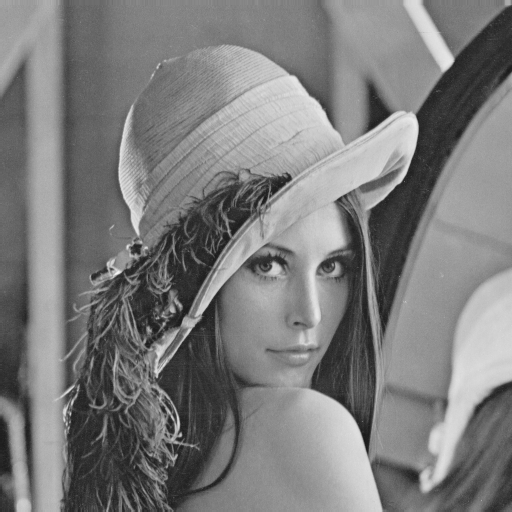

In [2]:
img = Image.open('./lena.bmp')
img

In [3]:
img_array = np.array(img)
width, height = img_array.shape
img_list = img_array.tolist()

In [4]:
# kernel = [[0,1,1,1,0], 
#           [1,1,1,1,1], 
#           [1,1,1,1,1],
#           [1,1,1,1,1],
#           [0,1,1,1,0]]
# in the manner of [row, col]

kernel = [(-2,-1),(-2,0),(-2,1), 
          (-1,-2),(-1,-1),(-1,0),(-1,1),(-1,2),
          (0,-2),(0,-1),(0,0),(0,1),(0,2),
          (1,-2),(1,-1),(1,0),(1,1),(1,2),
          (2,-1),(2,0),(2,1),]

# a. dilation

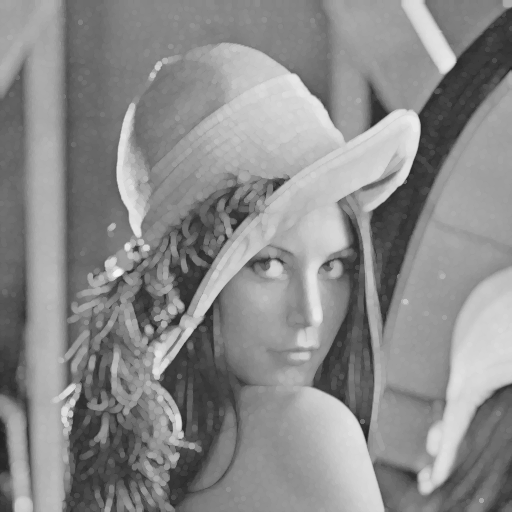

In [5]:
def dilation(img, kernel=kernel, height=height, width=width):
    dilation = [ [0 for x in range(width)] for y in range(height)]
    for y in range(height):
        for x in range(width):
            for dy, dx in kernel:
                y_, x_ = y+dy, x+dx
                if 0<= y_ < height and 0 <= x_ < width:
                    dilation[y][x] = max(img[y_][x_], dilation[y][x])
    return dilation

result = copy.deepcopy(img_list)
save_image(dilation(result, kernel), './dilation.bmp')

# b. erosion

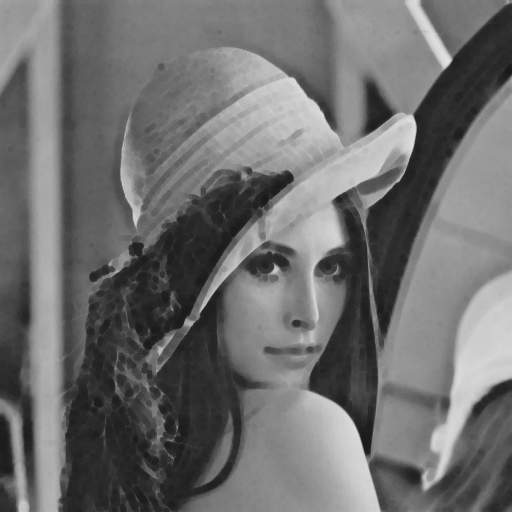

In [6]:
def erosion(img, kernel=kernel, height=height, width=width,):
    erosion = [ [255 for x in range(width)] for y in range(height)]
    for y in range(height):
        for x in range(width):
            for dy, dx in kernel:
                y_, x_ = y+dy, x+dx
                if 0<= y_ < height and 0 <= x_ < width:
                    erosion[y][x] = min(img[y_][x_], erosion[y][x])
    return erosion

result = copy.deepcopy(img_list)
save_image(erosion(result, kernel), './erosion.bmp')

# c. opening

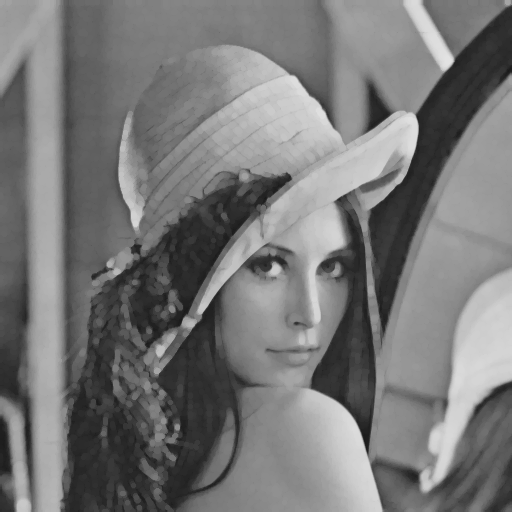

In [7]:
def opening(img, kernel=kernel, height=height, width=width):
    return dilation(erosion(img, kernel, height, width), kernel, height, width)

result = copy.deepcopy(img_list)
save_image(opening(result, kernel), './opening.bmp')

# d. closing

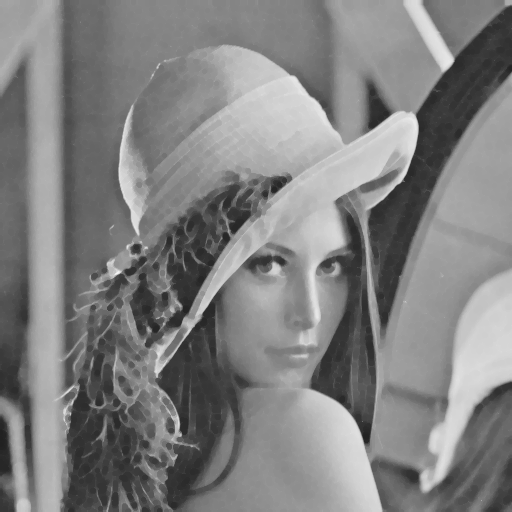

In [8]:
def closing(img, kernel=kernel, height=height, width=width):
    return erosion(dilation(img, kernel, height, width), kernel, height, width)

result = copy.deepcopy(img_list)
save_image(closing(result, kernel), './closing.bmp')